

# Project: Investigating the Soccer Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I have used the Soccer dataset which contains data corresponding to European Leagues, Players, Matches and Teams. It also contains attributes corresponding toPlayers, Teams and Matches. Using these datasets useful insights could be developed like relationship between stamina and age of a player and in which league home team wins mostnumber of matches  

In [69]:
#Packages to be installed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Loading the datasets and checking for cleanliness of the data

### General Properties

> Now Soccer dataset is an sql database, we are using sqlite3 package to connect to the database

### Data importing

In [71]:
#setting up the connection with sql database
with sqlite3.connect('database.sqlite') as con:
    country = pd.read_sql_query("SELECT * from Country", con)
    match = pd.read_sql_query("SELECT * from Match", con)
    league = pd.read_sql_query("SELECT * from League", con)
    team = pd.read_sql_query("SELECT * from Team", con)
    player = pd.read_sql_query("SELECT * from Player", con)
    player_attributes = pd.read_sql_query("SELECT * from Player_Attributes", con)
    team_attributes = pd.read_sql_query("SELECT * from Team_Attributes", con)
    sqlite_sequence = pd.read_sql_query("SELECT * from sqlite_sequence", con)

#### Checking for Data Types, Shape, and unique Country names for Country dataset

In [72]:
country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [73]:
country.shape

(11, 2)

In [74]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


> Which countries data are present in dataset?

In [75]:
country['name'].unique()

array(['Belgium', 'England', 'France', 'Germany', 'Italy', 'Netherlands',
       'Poland', 'Portugal', 'Scotland', 'Spain', 'Switzerland'], dtype=object)

### Checking for Shapes and Number of Leagues in League dataset

In [76]:
league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [77]:
league.shape

(11, 3)

In [78]:
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


>Names of Unique Football Leagues

In [79]:
league['name'].unique()

array(['Belgium Jupiler League', 'England Premier League',
       'France Ligue 1', 'Germany 1. Bundesliga', 'Italy Serie A',
       'Netherlands Eredivisie', 'Poland Ekstraklasa',
       'Portugal Liga ZON Sagres', 'Scotland Premier League',
       'Spain LIGA BBVA', 'Switzerland Super League'], dtype=object)

In [80]:
sum(league.duplicated())

0

### No. of Unique Teams in Team dataset

In [81]:
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [82]:
team.shape

(299, 5)

In [83]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [84]:
team['team_long_name'].nunique()

296

In [85]:
sum(team.duplicated())

0

### Unique Players in Players dataset

In [86]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [87]:
player.shape

(11060, 7)

In [88]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [89]:
player['player_fifa_api_id'].nunique()

11060

In [90]:
sum(player.duplicated())

0

### No.of Unique Seasons records in Match dataset

In [91]:
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [92]:
match.shape

(25979, 115)

In [93]:
match['season'].unique()

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

In [94]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


### Team_attributes

In [95]:
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [96]:
team_attributes.shape

(1458, 25)

In [97]:
sum(team_attributes.duplicated())

0

In [98]:
team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

### Player Attributes

In [99]:
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [100]:
player_attributes.shape

(183978, 42)

In [101]:
sum(player_attributes.duplicated())

0

In [102]:
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

### Droping Missing values in team_fifa_api_id from Team datasets

In [103]:
team1 = team.dropna()
team1.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [104]:
team1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 297
Data columns (total 5 columns):
id                  288 non-null int64
team_api_id         288 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      288 non-null object
team_short_name     288 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 13.5+ KB


In [105]:
team1.shape

(288, 5)

### In Player dataset getting the Birthday column in DateTime Format

In [106]:
import datetime
player['birthday'] = pd.to_datetime(player.birthday)
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154


In [107]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null datetime64[ns]
height                11060 non-null float64
weight                11060 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 604.9+ KB


### Extracting Date part in Date column in Match Dataset

In [108]:
match['date'] = pd.to_datetime(match.date)
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [109]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: datetime64[ns](1), float64(96), int64(9), object(9)
memory usage: 22.8+ MB


### Extracting Date part from Date Column in Team attributes

In [110]:
team_attributes['date'] = pd.to_datetime(team_attributes.date)
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [111]:
team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null datetime64[ns]
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreatio

### Extracting Date part from Date column in Player attribues dataset

In [112]:
player_attributes['date'] = pd.to_datetime(player_attributes.date)
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [113]:
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null datetime64[ns]
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float6

> Now we are done with Data importing, we would proceed to Data cleaning, treating missing values, changing the format of a variable etc. 

<a id='eda'></a>
## Exploratory Data Analysis

> We are done with Data Cleaning, now we would like to Explore the datasets and would try to create some useful insights using Data Visualization techniques 

### Does young players have more stamina?

> Calculating the age of the players for 2015 season

In [114]:
player['age'] = 2015 - pd.DatetimeIndex(player['birthday']).year
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,23
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,26
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163,24
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,198,33
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154,36


In [115]:
player_final = pd.merge(player, player_attributes, how = 'left', on ='player_fifa_api_id')
player_final.head()

,id_x,player_api_id_x,player_name,player_fifa_api_id,birthday,height,weight,age,id_y,player_api_id_y,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,23,1,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,23,2,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,23,3,505942,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,23,4,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,23,5,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


> Checking whether there is any relationship between Age and Stamina 

Text(0.5,1,'Scatter plot to study the relationship between Age and Stamina')

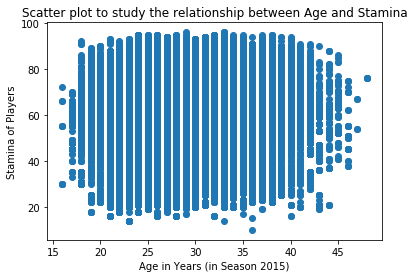

In [116]:
plt.scatter(player_final['age'], player_final['stamina'])
plt.xlabel('Age in Years (in Season 2015)')
plt.ylabel('Stamina of Players')
plt.title('Scatter plot to study the relationship between Age and Stamina')

> It seems lower the age, higher the stamina. But to further deep dive into the analysis, subsetting the age in categories:
Age < 25 years: "Low"
Age 25 - 35 years: "Medium"
Age > 35 years: "High"

In [117]:
player_final['age_category'] = 'High'
player_final.loc[(player_final['age'] < 25), 'age_category'] = 'Low'
player_final.loc[(player_final['age'] >= 25) & (player_final['age'] < 35), 'age_category'] = 'Medium'
player_final.head()

,id_x,player_api_id_x,player_name,player_fifa_api_id,birthday,height,weight,age,id_y,player_api_id_y,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age_category
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,23,1,505942,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Low
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,23,2,505942,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Low
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,23,3,505942,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,Low
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,23,4,505942,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Low
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,23,5,505942,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Low


Text(0.5,1,'Boxplot of Stamina of Players across Age Category')

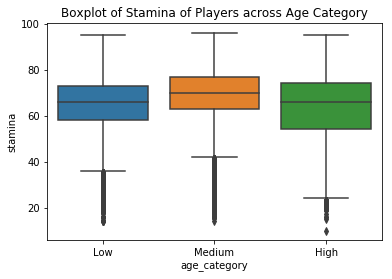

In [118]:
boxplot = sns.boxplot(x = 'age_category',  y = 'stamina', data = player_final)
boxplot.set_title('Boxplot of Stamina of Players across Age Category')

> The boxplot reveals that the players belonging to age category Medium is having higher Stamina as compared to those belonging to low and high. To further explore on this bar plot of the mean of stamina of players across age category.

Text(0,0.5,'Stamina of Players')

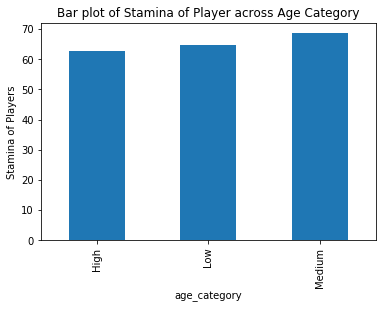

In [119]:
ax = player_final.groupby('age_category').stamina.mean().plot.bar(title = 'Bar plot of Stamina of Player across Age Category')
ax.set_ylabel('Stamina of Players')

> Thus above analysis clearly depicts that the Players of age 25 to 35 are having higher stamina as compared to Players in other catagories

   ### Does in European Leagues, Home Teams are wining more matches in 2015/2016 season as compared to 2015/2016 season?

In [120]:
league_match = pd.merge(match, league, how = 'left', left_on = ['league_id'], right_on = ['id'])
league_match.head()

,id_x,country_id_x,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCA,GBH,GBD,GBA,BSH,BSD,BSA,id_y,country_id_y,name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,...,4.50,1.78,3.25,4.00,1.73,3.40,4.20,1,1,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,...,3.25,1.85,3.25,3.75,1.91,3.25,3.60,1,1,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,...,2.65,2.50,3.20,2.50,2.30,3.20,2.75,1,1,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,...,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,1,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,...,1.65,4.50,3.50,1.65,4.75,3.30,1.67,1,1,Belgium Jupiler League


In [121]:
league_match['home_team_result'] = 'Home_Team_Won'
league_match.loc[(league_match['home_team_goal'] < league_match['away_team_goal']), 'home_team_result'] = 'Home_Team_Lost'
league_match.loc[(league_match['home_team_goal'] == league_match['away_team_goal']), 'home_team_result'] = 'Home_Team_Drew'
league_match.head()

,id_x,country_id_x,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,GBH,GBD,GBA,BSH,BSD,BSA,id_y,country_id_y,name,home_team_result
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,...,1.78,3.25,4.00,1.73,3.40,4.20,1,1,Belgium Jupiler League,Home_Team_Drew
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,...,1.85,3.25,3.75,1.91,3.25,3.60,1,1,Belgium Jupiler League,Home_Team_Drew
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,...,2.50,3.20,2.50,2.30,3.20,2.75,1,1,Belgium Jupiler League,Home_Team_Lost
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,...,1.50,3.75,5.50,1.44,3.75,6.50,1,1,Belgium Jupiler League,Home_Team_Won
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,...,4.50,3.50,1.65,4.75,3.30,1.67,1,1,Belgium Jupiler League,Home_Team_Lost


In [122]:
total_match = pd.DataFrame(league_match.groupby(['name', 'season']).match_api_id.count().unstack('season').reset_index())
total_match.head()

season,name,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016
0,Belgium Jupiler League,306,210,240,240,240,12,240,240
1,England Premier League,380,380,380,380,380,380,380,380
2,France Ligue 1,380,380,380,380,380,380,380,380
3,Germany 1. Bundesliga,306,306,306,306,306,306,306,306
4,Italy Serie A,380,380,380,358,380,380,379,380


> Renaming the columns accordingly

In [123]:
total_match.columns = [str(col) + '_total_match' for col in total_match.columns]
total_match.head()

,name_total_match,2008/2009_total_match,2009/2010_total_match,2010/2011_total_match,2011/2012_total_match,2012/2013_total_match,2013/2014_total_match,2014/2015_total_match,2015/2016_total_match
0,Belgium Jupiler League,306,210,240,240,240,12,240,240
1,England Premier League,380,380,380,380,380,380,380,380
2,France Ligue 1,380,380,380,380,380,380,380,380
3,Germany 1. Bundesliga,306,306,306,306,306,306,306,306
4,Italy Serie A,380,380,380,358,380,380,379,380


In [124]:
home_team_won = pd.DataFrame(league_match[league_match.home_team_result == 'Home_Team_Won'].groupby(['name', 'season']).match_api_id.count().unstack('season').reset_index())
home_team_won.head()

season,name,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016
0,Belgium Jupiler League,149,97,116,119,102,6,106,115
1,England Premier League,173,193,179,171,166,179,172,157
2,France Ligue 1,165,179,157,179,170,168,181,160
3,Germany 1. Bundesliga,147,125,141,139,130,145,145,135
4,Italy Serie A,192,186,179,165,177,181,152,175


In [125]:
home_team_won.columns = [str(col) + '_home_team_won' for col in home_team_won.columns]
home_team_won.head()

,name_home_team_won,2008/2009_home_team_won,2009/2010_home_team_won,2010/2011_home_team_won,2011/2012_home_team_won,2012/2013_home_team_won,2013/2014_home_team_won,2014/2015_home_team_won,2015/2016_home_team_won
0,Belgium Jupiler League,149,97,116,119,102,6,106,115
1,England Premier League,173,193,179,171,166,179,172,157
2,France Ligue 1,165,179,157,179,170,168,181,160
3,Germany 1. Bundesliga,147,125,141,139,130,145,145,135
4,Italy Serie A,192,186,179,165,177,181,152,175


In [126]:
final_merge = pd.merge(total_match, home_team_won, how = 'left', left_on = 'name_total_match', right_on = 'name_home_team_won')
final_merge.head()

,name_total_match,2008/2009_total_match,2009/2010_total_match,2010/2011_total_match,2011/2012_total_match,2012/2013_total_match,2013/2014_total_match,2014/2015_total_match,2015/2016_total_match,name_home_team_won,2008/2009_home_team_won,2009/2010_home_team_won,2010/2011_home_team_won,2011/2012_home_team_won,2012/2013_home_team_won,2013/2014_home_team_won,2014/2015_home_team_won,2015/2016_home_team_won
0,Belgium Jupiler League,306,210,240,240,240,12,240,240,Belgium Jupiler League,149,97,116,119,102,6,106,115
1,England Premier League,380,380,380,380,380,380,380,380,England Premier League,173,193,179,171,166,179,172,157
2,France Ligue 1,380,380,380,380,380,380,380,380,France Ligue 1,165,179,157,179,170,168,181,160
3,Germany 1. Bundesliga,306,306,306,306,306,306,306,306,Germany 1. Bundesliga,147,125,141,139,130,145,145,135
4,Italy Serie A,380,380,380,358,380,380,379,380,Italy Serie A,192,186,179,165,177,181,152,175


In [127]:
final_merge['2008/2009_win_percent'] =  (final_merge['2008/2009_home_team_won'] / final_merge['2008/2009_total_match']) * 100 
final_merge['2009/2010_win_percent'] =  (final_merge['2009/2010_home_team_won'] / final_merge['2009/2010_total_match']) * 100
final_merge['2010/2011_win_percent'] =  (final_merge['2010/2011_home_team_won'] / final_merge['2010/2011_total_match']) * 100
final_merge['2011/2012_win_percent'] =  (final_merge['2011/2012_home_team_won'] / final_merge['2011/2012_total_match']) * 100
final_merge['2012/2013_win_percent'] =  (final_merge['2012/2013_home_team_won'] / final_merge['2012/2013_total_match']) * 100
final_merge['2013/2014_win_percent'] =  (final_merge['2013/2014_home_team_won'] / final_merge['2013/2014_total_match']) * 100
final_merge['2014/2015_win_percent'] =  (final_merge['2014/2015_home_team_won'] / final_merge['2014/2015_total_match']) * 100
final_merge['2015/2016_win_percent'] =  (final_merge['2015/2016_home_team_won'] / final_merge['2015/2016_total_match']) * 100
final_merge.head()

,name_total_match,2008/2009_total_match,2009/2010_total_match,2010/2011_total_match,2011/2012_total_match,2012/2013_total_match,2013/2014_total_match,2014/2015_total_match,2015/2016_total_match,name_home_team_won,...,2014/2015_home_team_won,2015/2016_home_team_won,2008/2009_win_percent,2009/2010_win_percent,2010/2011_win_percent,2011/2012_win_percent,2012/2013_win_percent,2013/2014_win_percent,2014/2015_win_percent,2015/2016_win_percent
0,Belgium Jupiler League,306,210,240,240,240,12,240,240,Belgium Jupiler League,...,106,115,48.692810,46.190476,48.333333,49.583333,42.500000,50.000000,44.166667,47.916667
1,England Premier League,380,380,380,380,380,380,380,380,England Premier League,...,172,157,45.526316,50.789474,47.105263,45.000000,43.684211,47.105263,45.263158,41.315789
2,France Ligue 1,380,380,380,380,380,380,380,380,France Ligue 1,...,181,160,43.421053,47.105263,41.315789,47.105263,44.736842,44.210526,47.631579,42.105263
3,Germany 1. Bundesliga,306,306,306,306,306,306,306,306,Germany 1. Bundesliga,...,145,135,48.039216,40.849673,46.078431,45.424837,42.483660,47.385621,47.385621,44.117647
4,Italy Serie A,380,380,380,358,380,380,379,380,Italy Serie A,...,152,175,50.526316,48.947368,47.105263,46.089385,46.578947,47.631579,40.105541,46.052632


Text(0,0.5,'European Leagues')

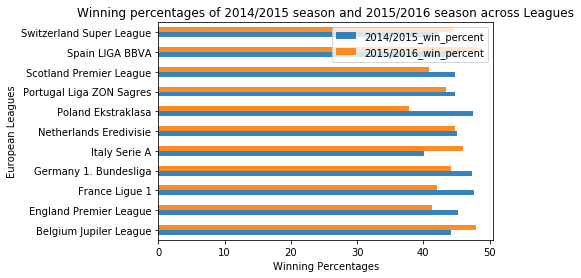

In [128]:
ay = final_merge.groupby('name_total_match')['2014/2015_win_percent', '2015/2016_win_percent'].mean().plot(kind = 'barh', title = 'Winning percentages of 2014/2015 season and 2015/2016 season across Leagues', alpha = 0.9)
ay.set_xlabel('Winning Percentages')
ay.set_ylabel('European Leagues')

> Above plot shows that only in Switzerland Super League, Spain LIGA BBVA, Italy Serie A and Belgium Jupiler League has high percentage of Home Team winning matches in 2015/2016 season as compared to 2014/2015 season while other Leagues shows the opposite picture

<a id='conclusions'></a>
## Conclusions

> Thus from above exploratory analysis it is seen that Players belonging to age category 25 to 35 are having high stamina. But there might other attributes that are contributing to stamina of a player apart than age. For that proper statistical models could be used and also clusterring techniques could be used to segregate players on the basis of stamina using other attributes.

> It is also seen in Switzerland Super League, Spain LIGA BBVA, Italy Serie A and Belgium Jupiler League has high percentage of Home Team winning matches in 2015/2016 season as compared to 2014/2015 season while other Leagues shows the opposite picture
Now statistical models could be used, for e.g. which factors are influencing for the Home Team to Win more matches in Spain LIGA BBVA. Similarly the underlined reason behind the Away Team winning more matches in England Premier League could be looked upon.



## Limitations

> The records corresponding to missing fifa_team_api_id had been dropped from the the Team dataset, as it's an id variable and it can't be imputed by mean or median. Thus results of both home and away matches corresponding to these Teams can't be analyzed. The drop in count of number of Teams is from 299 to 288, i.e. 11. Thus, 288 Teams could be considered as a significant representative of the population. 

In [129]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigating_the_Soccer_dataset-Project_Re-Submission-updated_version.ipynb'])

0